In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import locale

In [2]:
df = pd.read_csv('data-2.csv')

In [3]:
#quick quantitative summary of data in dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [4]:
#sneak preview of dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# creation of missing values dataframe for visualisation
df_msn = pd.DataFrame(df.isna().sum())
df_msn['Features'] = df_msn.index
df_msn['MissingValues'] = df_msn[0]

df_msn

,0,Features,MissingValues
InvoiceNo,0,InvoiceNo,0
StockCode,0,StockCode,0
Description,1454,Description,1454
Quantity,0,Quantity,0
InvoiceDate,0,InvoiceDate,0
UnitPrice,0,UnitPrice,0
CustomerID,135080,CustomerID,135080
Country,0,Country,0


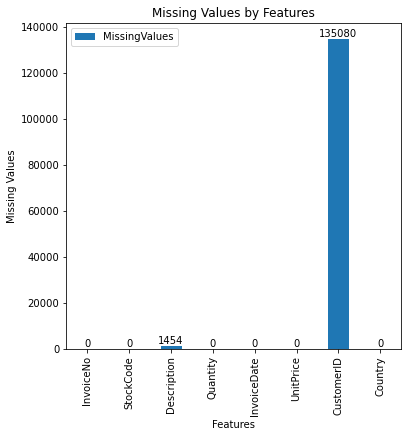

In [7]:
ax = df_msn.plot(x='Features', y='MissingValues',kind='bar',title='Missing Values by Features',figsize=(6,6), xlabel='Features', ylabel='Missing Values')
for heights in ax.containers:
    ax.bar_label(heights)

In [8]:
# displaying NaN values in Description column
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [9]:
# making a copy to run data cleaning
# not required, personal preference
testdf = df.copy()

In [10]:
# removing NaN values in CustomerID
testdf.dropna(subset=['CustomerID'], inplace=True)
testdf

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [11]:
testdf.drop(testdf.query('Description in ["POSTAGE", "CARRIAGE", "Discount", "DOTCOM POSTAGE", "CRUK Commission", "Manual"]').index, axis=0, inplace=True)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404925 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    404925 non-null  object 
 1   StockCode    404925 non-null  object 
 2   Description  404925 non-null  object 
 3   Quantity     404925 non-null  int64  
 4   InvoiceDate  404925 non-null  object 
 5   UnitPrice    404925 non-null  float64
 6   CustomerID   404925 non-null  float64
 7   Country      404925 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.8+ MB


In [12]:
# display unique values in Country column
testdf['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [13]:
# dropping Unspecified values in Country column
testdf.drop(testdf[testdf['Country'] == "Unspecified"].index, inplace=True)


In [14]:
# changing datatypes of InvoiceDate to datetime, CustomerID to integer
testdf = testdf.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID':'int64'})
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404681 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    404681 non-null  object        
 1   StockCode    404681 non-null  object        
 2   Description  404681 non-null  object        
 3   Quantity     404681 non-null  int64         
 4   InvoiceDate  404681 non-null  datetime64[ns]
 5   UnitPrice    404681 non-null  float64       
 6   CustomerID   404681 non-null  int64         
 7   Country      404681 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.8+ MB


In [15]:
# checking negative values in Quantity
testdf.query('Quantity < 0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315,United Kingdom


In [16]:
testdf['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'USA', 'European Community', 'Bahrain', 'Malta', 'RSA'],
      dtype=object)

In [17]:
# adjusting initials of countries to proper names
testdf.loc[testdf['Country'] == "EIRE", "Country"] = "Ireland"
testdf.loc[testdf['Country'] == "USA", "Country"] = "United States of America"
testdf.loc[testdf['Country'] == "RSA", "Country"] = "South Africa"

In [18]:
testdf['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'Ireland', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Brazil', 'United States of America', 'European Community',
       'Bahrain', 'Malta', 'South Africa'], dtype=object)

In [19]:
# adding revenue column to dataset
testdf['Revenue'] = abs(testdf['Quantity'] * testdf['UnitPrice'])
testdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [20]:
# retrieving various date related info and creating suitable columns for them
testdf['Year'] = testdf['InvoiceDate'].dt.year
testdf['Month'] = testdf['InvoiceDate'].dt.month_name()
testdf['Day'] = testdf['InvoiceDate'].dt.day_name()
testdf['Date'] = testdf[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
testdf['Hour'] = testdf['InvoiceDate'].dt.hour

In [21]:
testdf.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,Wednesday,December-2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,Wednesday,December-2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8


In [22]:
# creating a new dataframe w transactions containing non negative quantities
sales = testdf[~testdf['InvoiceNo'].str.contains("C")]
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Year,Month,Day,Date,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,December,Wednesday,December-2010,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,December,Wednesday,December-2010,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,December,Wednesday,December-2010,8


In [23]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396142 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    396142 non-null  object        
 1   StockCode    396142 non-null  object        
 2   Description  396142 non-null  object        
 3   Quantity     396142 non-null  int64         
 4   InvoiceDate  396142 non-null  datetime64[ns]
 5   UnitPrice    396142 non-null  float64       
 6   CustomerID   396142 non-null  int64         
 7   Country      396142 non-null  object        
 8   Revenue      396142 non-null  float64       
 9   Year         396142 non-null  int64         
 10  Month        396142 non-null  object        
 11  Day          396142 non-null  object        
 12  Date         396142 non-null  object        
 13  Hour         396142 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 45.3+ MB


In [34]:
sales.to_csv('sales.csv', index=False)

  ## Analysing revenue by month

In [24]:
revenueDate = sales.groupby(['Date'], as_index=False)['Revenue'].sum().round(2)
revenueDate

,Date,Revenue
0,April-2011,454982.81
1,August-2011,636276.21
2,December-2010,567505.72
3,December-2011,513245.43
4,February-2011,443346.02
5,January-2011,564041.64
6,July-2011,591933.42
7,June-2011,654246.78
8,March-2011,584562.85
9,May-2011,659644.22


In [25]:
#sorting the revenue dataframe by date
revenueDate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     13 non-null     object 
 1   Revenue  13 non-null     float64
dtypes: float64(1), object(1)
memory usage: 336.0+ bytes


In [26]:
#changing datatype of date to datetime to sort
revenueDate["Date"] = revenueDate["Date"].astype('datetime64[ns]')
#sorting values by date
revenueDate.sort_values(by='Date', ascending=True, inplace=True)
#converting back to string values
revenueDate['Year'] = revenueDate['Date'].dt.year
revenueDate['Month'] = revenueDate['Date'].dt.month_name()
revenueDate['Month'] = revenueDate[['Month', 'Year']].astype(str).apply('-'.join, axis=1)
revenueDate.drop(['Date','Year'], axis=1)
revenueDate = revenueDate[['Month','Revenue']]

#checking dataframe
revenueDate

,Month,Revenue
2,December-2010,567505.72
5,January-2011,564041.64
4,February-2011,443346.02
8,March-2011,584562.85
0,April-2011,454982.81
9,May-2011,659644.22
7,June-2011,654246.78
6,July-2011,591933.42
1,August-2011,636276.21
12,September-2011,940930.81


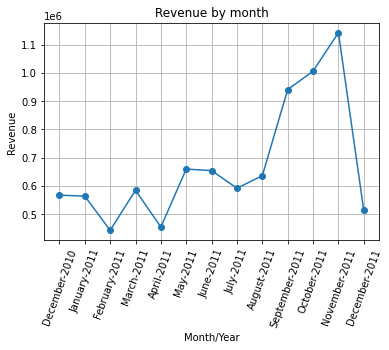

In [27]:
#plotting line graph
# Extract the date and close price columns
dates = revenueDate['Month']
revenue = revenueDate['Revenue']

# Create a line plot
plt.plot(dates, revenue, marker='o')
plt.title('Revenue by month')
plt.xlabel('Month/Year')
plt.ylabel('Revenue')

plt.xticks(rotation=70)
plt.grid(True)

# Show the plot
plt.show()

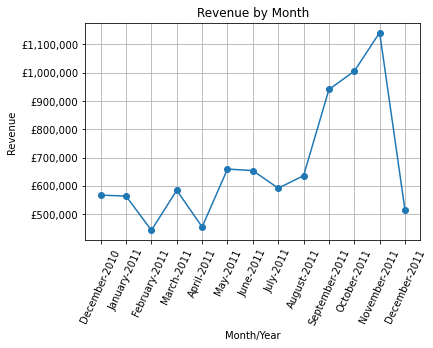

In [28]:
#exploring second option (slightly better)
fig, ax = plt.subplots()
ax.plot(dates, revenue, marker='o')

ax.set_xlabel('Month/Year')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by Month')

fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

plt.xticks(rotation=65)
plt.grid(True)
plt.show()

## Analysing revenue by day

In [29]:
revenueDay = sales.groupby(['Day'], as_index=False)['Revenue'].sum().round(2)
revenueDay['Order'] = ['5', '1', '6', '4', '2', '3']
revenueDay.sort_values(by='Order', inplace=True)
revenueDay

,Day,Revenue,Order
1,Monday,1328726.58,1
4,Tuesday,1674571.27,2
5,Wednesday,1563551.59,3
3,Thursday,1942303.77,4
0,Friday,1462648.67,5
2,Sunday,786762.70,6


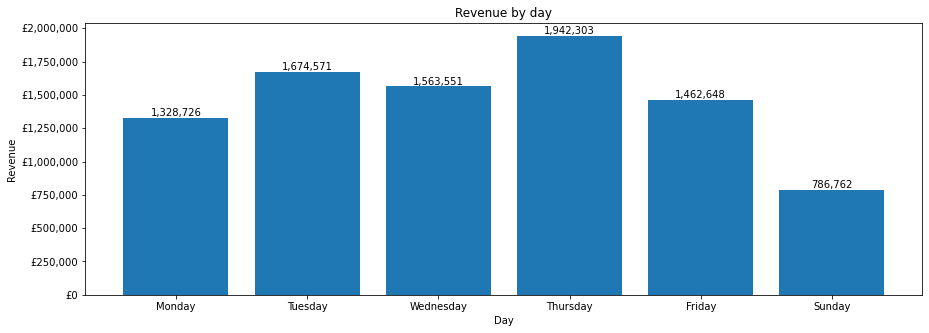

In [30]:
#plotting bar chart
fig, ax = plt.subplots(1,1,figsize=(15,5))
rD = ax.bar(revenueDay['Day'], revenueDay['Revenue'])
ax.set_xlabel('Day')
ax.set_ylabel('Revenue')
ax.set_title('Revenue by day')

#setting up and applying formatting string syntax for y axis
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#setting locale for thousands separator
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rD:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom'
    )

#add rotation for x labels
plt.show()

## Analysing revenue by hour

In [31]:
revenueHour = sales.groupby(['Hour'], as_index=False)['Revenue'].sum().round(2)
revenueHour

,Hour,Revenue
0,6,4.25
1,7,30469.21
2,8,277662.63
3,9,829042.32
4,10,1243832.58
5,11,1087369.16
6,12,1366001.91
7,13,1142366.12
8,14,971412.98
9,15,948993.18


## Analysing revenue by country

In [32]:
#extracting/sorting revenue by country
revenueCountry = sales.groupby(['Country'], as_index=False)['Revenue'].sum().round(2)
#sorting by descending order
revenueCountry.sort_values(by='Revenue', ascending=False, inplace=True)
revenueCountry

,Country,Revenue
34,United Kingdom,7266027.23
23,Netherlands,283889.34
16,Ireland,257296.56
13,Germany,205569.89
12,France,183891.68
0,Australia,138171.31
30,Spain,55725.11
32,Switzerland,52441.95
19,Japan,37416.37
3,Belgium,36927.34


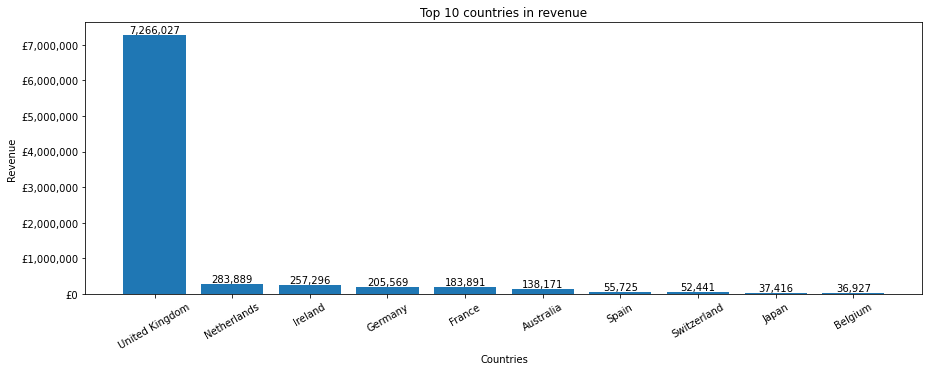

In [33]:
#filtering top 10 country and revenue
country = revenueCountry['Country'][:10]
revenueC = revenueCountry['Revenue'][:10]

#plotting bar chart
fig, ax = plt.subplots(1,1,figsize=(15,5))
rC = ax.bar(country, revenueC)
ax.set_xlabel('Countries')
ax.set_ylabel('Revenue')
ax.set_title('Top 10 countries in revenue')

#setting up and applying formatting string syntax for x axis
fmt = '£{x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick) 

#setting locale for thousands separator
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

#function to format label with thousands separator
def format_label(value):
    return locale.format_string("%d", value, grouping=True)

#add bar labels
for bar in rC:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom'
    )

#add rotation for x labels
plt.xticks(rotation=30)
plt.show()
